# Import Libraries

In [1]:
import numpy as np
import requests
import pandas as pd
import csv
!conda install -c conda-forge folium=0.5.0 --yes
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import folium
import json
import matplotlib as mp
from sklearn.cluster import KMeans

print('Import Completed')


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/conda-forge/win-64'




Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - geopy


The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0
  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.2-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1


Preparing transaction: ...working... done
Verifying transaction: ...working... failed




==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




Import Completed


In [2]:
from bs4 import BeautifulSoup

In [3]:
import xml

In [4]:
#define url to webscrape
source = requests.get('https://en.wikipedia.org/wiki/List_of_Houston_neighborhoods').text
soup = BeautifulSoup(source,'html')

#makes it easy to read
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of Houston neighborhoods - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"3bd2e040-6932-474a-bf91-a6af3896c1c2","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_Houston_neighborhoods","wgTitle":"List of Houston neighborhoods","wgCurRevisionId":947781372,"wgRevisionId":947781372,"wgArticleId":5645575,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Articles needing additional references from May 2018","All articles

# Extract Data

In [5]:
#table generation
table = soup.find('table',{'class':'wikitable'})
table

<table class="wikitable">
<caption>
</caption>
<tbody><tr>
<th>#
</th>
<th>Name
</th>
<th>Location relative to <a href="/wiki/Downtown_Houston" title="Downtown Houston">Downtown Houston</a>
</th>
<th>Approximate boundaries
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Willowbrook,_Houston" title="Willowbrook, Houston">Willowbrook</a>
</td>
<td>Northwest
</td>
<td>Along <a href="/wiki/Texas_State_Highway_249" title="Texas State Highway 249">Texas State Highway 249</a> northwest of Beltway 8
</td></tr>
<tr>
<td>2
</td>
<td><a href="/wiki/Greenspoint,_Houston" title="Greenspoint, Houston">Greater Greenspoint</a>
</td>
<td>North
</td>
<td>Around the junction of Beltway 8 and Interstate 45 North
</td></tr>
<tr>
<td>3
</td>
<td>Carverdale
</td>
<td>Northwest
</td>
<td>South of the junction of Beltway 8 and <a href="/wiki/U.S._Route_290" title="U.S. Route 290">U.S. Route 290</a>
</td></tr>
<tr>
<td>4
</td>
<td><a href="/wiki/Fairbanks,_Houston" title="Fairbanks, Houston">Fairbanks</a> / Nort

In [6]:
#find the table we need
links = table.find_all('td')
links

[<td>1
 </td>,
 <td><a href="/wiki/Willowbrook,_Houston" title="Willowbrook, Houston">Willowbrook</a>
 </td>,
 <td>Northwest
 </td>,
 <td>Along <a href="/wiki/Texas_State_Highway_249" title="Texas State Highway 249">Texas State Highway 249</a> northwest of Beltway 8
 </td>,
 <td>2
 </td>,
 <td><a href="/wiki/Greenspoint,_Houston" title="Greenspoint, Houston">Greater Greenspoint</a>
 </td>,
 <td>North
 </td>,
 <td>Around the junction of Beltway 8 and Interstate 45 North
 </td>,
 <td>3
 </td>,
 <td>Carverdale
 </td>,
 <td>Northwest
 </td>,
 <td>South of the junction of Beltway 8 and <a href="/wiki/U.S._Route_290" title="U.S. Route 290">U.S. Route 290</a>
 </td>,
 <td>4
 </td>,
 <td><a href="/wiki/Fairbanks,_Houston" title="Fairbanks, Houston">Fairbanks</a> / Northwest Crossing
 </td>,
 <td>Northwest
 </td>,
 <td>Along U.S. Route 290 between Interstate 610 and Beltway 8
 </td>,
 <td>5
 </td>,
 <td><a href="/wiki/Inwood_Forest,_Houston" title="Inwood Forest, Houston">Greater Inwood</a>
 </

In [7]:
#create list of what we want from table
Number = []
Name = [] 
Relative = []

In [8]:
#scrapes values of td for only text and assigns them to respective areas
for i in range(0, len(links), 4):
    Number.append(links[i])
    Name.append(links[i+1].find(text=True).rstrip())
    Relative.append(links[i+2].find(text=True).rstrip())

In [9]:
#puts into a data frame
df_Houstonsuper = pd.DataFrame(data=[Number,Name,Relative]).transpose()
df_Houstonsuper.columns =['Number', 'Name','Location Relative to Downtown Houston']

In [10]:
#let see how it looks
df_Houstonsuper.head(60)

,Number,Name,Location Relative to Downtown Houston
0,[1\n],Willowbrook,Northwest
1,[2\n],Greater Greenspoint,North
2,[3\n],Carverdale,Northwest
3,[4\n],Fairbanks,Northwest
4,[5\n],Greater Inwood,Northwest
5,[6\n],Acres Home,Northwest
6,[7\n],Hidden Valley,North
7,[8\n],Westbranch,West
8,[9\n],Addicks / Park Ten,West
9,[10\n],Spring Branch,West


In [11]:
df_Houstonsuper.shape

(88, 3)

In [12]:
import geocoder
print('Imported')

Imported


In [13]:
def get_latlng(name):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Houston, Texas'.format(name))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [14]:
coords = [ get_latlng(name) for name in df_Houstonsuper['Name'].tolist()]

In [15]:
coords

[[29.95240000000007, -95.54462999999998],
 [29.939670000000035, -95.40747999999996],
 [29.849590000000035, -95.54244999999997],
 [29.852730000000065, -95.52418999999998],
 [29.86931000000004, -95.48042999999996],
 [29.87047000000007, -95.43535999999995],
 [29.88847000000004, -95.41459999999995],
 [29.83937000000003, -95.55360999999999],
 [29.814340000000072, -95.61592999999999],
 [29.803512737626196, -95.51587483219035],
 [29.826440000000048, -95.48876999999999],
 [33.217340000000036, -96.62706999999995],
 [29.82797000000005, -95.39369999999997],
 [29.79684000000003, -95.43403999999998],
 [29.796250000000043, -95.39486999999997],
 [29.77263000000005, -95.57091999999994],
 [29.75795000000005, -95.63096999999999],
 [29.74768000000006, -95.57423999999997],
 [29.725484461288932, -95.55103598948064],
 [29.732170000000053, -95.52336999999994],
 [29.760150000000067, -95.47670999999997],
 [29.888899459838154, -95.32449993087188],
 [29.803758799994004, -95.47214984736263],
 [29.760780000000068,

In [17]:
#create temporty data frome
df_coords =pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [18]:
#Merge to old dataframe
df_Houstonsuper['Latitude']=df_coords['Latitude']
df_Houstonsuper['Longitude']=df_coords['Longitude']

In [19]:
#check combined data frame for lat and lng data
df_Houstonsuper

,Number,Name,Location Relative to Downtown Houston,Latitude,Longitude
0,[1\n],Willowbrook,Northwest,29.952400,-95.544630
1,[2\n],Greater Greenspoint,North,29.939670,-95.407480
2,[3\n],Carverdale,Northwest,29.849590,-95.542450
3,[4\n],Fairbanks,Northwest,29.852730,-95.524190
4,[5\n],Greater Inwood,Northwest,29.869310,-95.480430
...,...,...,...,...,...
83,[84\n],Spring Branch,Northwest,29.803513,-95.515875
84,[85\n],Spring Branch Central,Northwest,29.815870,-95.517730
85,[86\n],Spring Branch East,Northwest,29.807620,-95.480110
86,[87\n],Greenway,Southwest,29.732219,-95.428810


In [20]:
#check shape
print(df_Houstonsuper.shape)

(88, 5)


In [21]:
#save as csv file
df_Houstonsuper.to_csv("df_Houstonsuper.csv", index=False)

# Map Of Super Neighborhoods

In [61]:
#get location of Houston Texas

address ='Houston, Texas'
geolocator = Nominatim(user_agent='muhammadmusamubi@yahoo.com')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [62]:
print('Geographical location of Houston Texas is {},{}.'.format(latitude, longitude))

Geographical location of Houston Texas is 29.7589382,-95.3676974.


In [63]:
#Houston Map
Houston_map = folium.Map(location=[latitude, longitude], zoom_start = 11)

for lat, lng, name in zip(df_Houstonsuper['Latitude'], df_Houstonsuper['Longitude'], df_Houstonsuper['Name']):
    label = '{}'.format(name)
    popup = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius = 5,
    popup = popup,
    color = 'blue',
    fill = True,
    fill_color = '#3186cc',
    fill_opacity = 0.7,
    parse_html=False).add_to(Houston_map)
    
Houston_map

In [64]:
#save as HTML
Houston_map.save ('Housto_map.html')

# Four Square Credentials

In [66]:
# Define foursquare credentials
CLIENT_ID = 'S2Z5NXAHC0YLN0TSNRMZTIGYIR4YKTT1OJXLCGAGELHSFG3Z' # your Foursquare ID
CLIENT_SECRET = 'NOGR1PIVL21F44DUABGZJCLDHTCC0XTGMNGX52UHK3GVYYSL' # your Foursquare Secret
VERSION = '20200717' # Foursquare API version

In [68]:
#Category ID corresponding to food and drink shop taken from Foursquare website (https://developer.foursquare.com/docs/resources/categories)

radius = 2000
LIMIT = 100

venues_list = []

for lat,lng, name in zip(df_Houstonsuper['Latitude'],df_Houstonsuper['Longitude'],df_Houstonsuper['Name']):
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for v in results:
        venues_list.append((
                name,
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']))

In [69]:
#venue_list to new data frame
df_venues = pd.DataFrame(venues_list)

#column names
df_venues.columns = ['Name', 
                     'Name Latitude', 
                     'Name Longitude', 
                     'Venue Name',
                     'Venue Latitude',
                     'Venue Logitude',
                     'Venue Category']

df_venues.head()

,Name,Name Latitude,Name Longitude,Venue Name,Venue Latitude,Venue Logitude,Venue Category
0,Willowbrook,29.9524,-95.54463,Costco,29.954658,-95.547697,Warehouse Store
1,Willowbrook,29.9524,-95.54463,Saltgrass Steak House,29.955011,-95.542082,Steakhouse
2,Willowbrook,29.9524,-95.54463,Babin's Seafood House,29.955088,-95.544452,Seafood Restaurant
3,Willowbrook,29.9524,-95.54463,buybuy BABY,29.953127,-95.543557,Kids Store
4,Willowbrook,29.9524,-95.54463,Bed Bath & Beyond,29.953517,-95.543865,Furniture / Home Store


In [70]:
print(df_venues.shape)

(4954, 7)


In [71]:
# How many Venues for each neighborhood
df_venues.groupby(['Name']).count()

,Name Latitude,Name Longitude,Venue Name,Venue Latitude,Venue Logitude,Venue Category
Name,,,,,,
Acres Home,8,8,8,8,8,8
Addicks / Park Ten,5,5,5,5,5,5
Afton Oaks,100,100,100,100,100,100
Alief,61,61,61,61,61,61
Astrodome Area,51,51,51,51,51,51
...,...,...,...,...,...,...
Westbury,29,29,29,29,29,29
Westchase,100,100,100,100,100,100
Westwood,80,80,80,80,80,80


In [72]:
#Average number of venues gathered
df_venues.groupby(['Name']).count().mean()

Name Latitude     56.942529
Name Longitude    56.942529
Venue Name        56.942529
Venue Latitude    56.942529
Venue Logitude    56.942529
Venue Category    56.942529
dtype: float64

# Unique Categories from Venues

In [73]:
print('There are {} unique categories'.format(len(df_venues['Venue Category'].unique())))

There are 320 unique categories


In [74]:
#print out list of venue categories
df_venues['Venue Category'].unique()[:50]

array(['Warehouse Store', 'Steakhouse', 'Seafood Restaurant',
       'Kids Store', 'Furniture / Home Store', 'Wings Joint',
       'Vietnamese Restaurant', 'Sporting Goods Shop', 'Thai Restaurant',
       'Toy / Game Store', 'Health & Beauty Service',
       'Latin American Restaurant', 'Movie Theater', 'Buffet',
       'American Restaurant', 'Department Store', 'Coffee Shop',
       'Chinese Restaurant', 'Fried Chicken Joint', 'Lingerie Store',
       'Mexican Restaurant', 'Bar', 'Wine Shop', 'Electronics Store',
       'Gym', 'Clothing Store', 'Fast Food Restaurant', 'Cosmetics Shop',
       'Hotel', 'Bakery', 'Italian Restaurant', 'Deli / Bodega',
       'Burger Joint', 'Pet Store', 'Grocery Store',
       'Modern European Restaurant', 'Shoe Store', 'Gym / Fitness Center',
       'Mobile Phone Shop', 'Cajun / Creole Restaurant',
       'Arts & Crafts Store', 'Chocolate Shop', 'Japanese Restaurant',
       'Taco Place', 'Juice Bar', 'Supplement Shop', 'Accessories Store',
       'Opt

# Analyze Each Neighborhood

In [75]:
Houston_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix = "", prefix_sep = "")

#add Name column back to dataframe
Houston_onehot['Name'] = df_venues['Name']

#move Name to first column
fixed_columns = [Houston_onehot.columns[-1]] + list(Houston_onehot.columns[:-1])
Houston_onehot = Houston_onehot[fixed_columns]

Houston_onehot.head()

,Name,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Volleyball Court,Warehouse,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Willowbrook,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Group Rows by Name and Show Mean of Frequency of Occurance for each Category

In [76]:
Houston_grouped = Houston_onehot.groupby('Name').mean().reset_index()
Houston_grouped

,Name,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Volleyball Court,Warehouse,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Acres Home,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.00,0.000000,0.00,0.0,0.0,0.0
1,Addicks / Park Ten,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.00,0.000000,0.00,0.0,0.0,0.0
2,Afton Oaks,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.00,0.020000,0.00,0.0,0.0,0.0
3,Alief,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.00,0.000000,0.00,0.0,0.0,0.0
4,Astrodome Area,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.019608,...,0.0,0.0,0.00,0.0,0.00,0.000000,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Westbury,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.00,0.000000,0.00,0.0,0.0,0.0
83,Westchase,0.0,0.010000,0.0,0.0100,0.0,0.0,0.0,0.0,0.010000,...,0.0,0.0,0.00,0.0,0.00,0.010000,0.00,0.0,0.0,0.0
84,Westwood,0.0,0.000000,0.0,0.0125,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.00,0.012500,0.00,0.0,0.0,0.0
85,Willow Meadows / Willowbend,0.0,0.014493,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00,0.0,0.00,0.014493,0.00,0.0,0.0,0.0


In [77]:
print(Houston_grouped.shape)

(87, 321)


In [78]:
#number of grocery stores
len(Houston_grouped[Houston_grouped["Grocery Store"] > 0])

49

# Data with Only Grocery Store 

In [79]:
Houston_grocery = Houston_grouped[['Name','Grocery Store']]

In [80]:
Houston_grocery.head(60)

,Name,Grocery Store
0,Acres Home,0.125000
1,Addicks / Park Ten,0.000000
2,Afton Oaks,0.000000
3,Alief,0.016393
4,Astrodome Area,0.019608
5,Braeburn,0.055556
6,Braeswood,0.021978
7,Brays Oaks (formerly Greater Fondren S.W.),0.072727
8,Briar Forest,0.050000
9,Carverdale,0.000000


# Cluster Houston Neighborhoods

In [81]:
from sklearn.cluster import KMeans

In [82]:
#set number of clusters
kclusters = 4

Houston_grocery_clustering = Houston_grocery.drop(['Name'],1)

#run k-means
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Houston_grocery_clustering)

#check cluster labels
kmeans.labels_[0:10]

array([3, 0, 0, 2, 2, 1, 2, 1, 2, 0])

In [83]:
#create new data frame that includes cluster
Houston_merged = Houston_grocery.copy()

#add clustering label
Houston_merged['Cluster Labels'] = kmeans.labels_

In [84]:
Houston_merged.head()

,Name,Grocery Store,Cluster Labels
0,Acres Home,0.125000,3
1,Addicks / Park Ten,0.000000,0
2,Afton Oaks,0.000000,0
3,Alief,0.016393,2
4,Astrodome Area,0.019608,2


# Merge Datasets into one Data Frame

In [85]:
Houston_merged = Houston_merged.join(df_Houstonsuper.set_index('Name'), on='Name')

Houston_merged.head()

,Name,Grocery Store,Cluster Labels,Number,Location Relative to Downtown Houston,Latitude,Longitude
0,Acres Home,0.125000,3,[6\n],Northwest,29.870470,-95.43536
1,Addicks / Park Ten,0.000000,0,[9\n],West,29.814340,-95.61593
2,Afton Oaks,0.000000,0,[23\n],West,29.803759,-95.47215
3,Alief,0.016393,2,[25\n],Southwest,29.710880,-95.59569
4,Astrodome Area,0.019608,2,[34\n],South,29.691500,-95.38869


In [86]:
print(Houston_merged.shape)

(88, 7)


In [87]:
#sort by cluster label
Houston_merged.sort_values(['Cluster Labels'], inplace = True)
Houston_merged

,Name,Grocery Store,Cluster Labels,Number,Location Relative to Downtown Houston,Latitude,Longitude
43,Jensen,0.000000,0,[46\n],Northeast,29.799362,-95.342180
36,Gulfgate Riverview /,0.000000,0,[69\n],Southeast,29.699298,-95.295576
40,Hunterwood,0.000000,0,[54\n],Northeast,29.819610,-95.210380
41,IAH Airport,0.000000,0,[42\n],North,29.987890,-95.349480
42,Independence Heights,0.012048,0,[13\n],North,29.827970,-95.393700
...,...,...,...,...,...,...,...
62,Northside / Northline,0.033333,2,[45\n],North,29.853430,-95.384560
18,Edgebrook,0.017857,2,[79\n],Southeast,29.642620,-95.226860
23,Fort Bend / Houston,0.117647,3,[41\n],Southwest,29.594700,-95.486030
70,South Acres / Crestmont Park,0.176471,3,[76\n],South,29.631100,-95.354150


# Visualize Clusters

In [93]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, name, cluster in zip(Houston_merged['Latitude'], Houston_merged['Longitude'], Houston_merged['Name'], Houston_merged['Cluster Labels']):
    label = folium.Popup(str(name) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [94]:
#save map as HTML
map_clusters.save('map_cluster.html')

# Examine Clusters

In [95]:
#cluster 0
Houston_merged.loc[Houston_merged['Cluster Labels'] == 0]

,Name,Grocery Store,Cluster Labels,Number,Location Relative to Downtown Houston,Latitude,Longitude
43,Jensen,0.000000,0,[46\n],Northeast,29.799362,-95.342180
36,Gulfgate Riverview /,0.000000,0,[69\n],Southeast,29.699298,-95.295576
40,Hunterwood,0.000000,0,[54\n],Northeast,29.819610,-95.210380
41,IAH Airport,0.000000,0,[42\n],North,29.987890,-95.349480
42,Independence Heights,0.012048,0,[13\n],North,29.827970,-95.393700
85,Willow Meadows / Willowbend,0.000000,0,[38\n],Southwest,29.668350,-95.445200
44,Kashmere Gardens,0.000000,0,[52\n],Northeast,29.803110,-95.312980
45,Kingwood,0.000000,0,[43\n],Northeast,30.063467,-95.154951
46,Lake Houston,0.000000,0,[44\n],Northeast,30.020270,-95.110510
48,Lawndale / Wayside,0.013514,0,[88\n],Southeast,29.722740,-95.305910


In [96]:
#cluster 1
Houston_merged.loc[Houston_merged['Cluster Labels']==1]

,Name,Grocery Store,Cluster Labels,Number,Location Relative to Downtown Houston,Latitude,Longitude
5,Braeburn,0.055556,1,[30\n],Southwest,29.67839,-95.51126
82,Westbury,0.103448,1,[37\n],Southwest,29.65596,-95.48209
52,Meadowbrook / Allendale,0.076923,1,[75\n],Southeast,29.69446,-95.24660
16,East Houston,0.100000,1,[49\n],Northeast,29.84476,-95.25586
39,Hidden Valley,0.090909,1,[7\n],North,29.88847,-95.41460
7,Brays Oaks (formerly Greater Fondren S.W.),0.072727,1,[36\n],Southwest,29.65732,-95.51693
78,Trinity / Houston Gardens,0.066667,1,[48\n],Northeast,29.82594,-95.30836
17,East Little York / Homestead,0.066667,1,[47\n],Northeast,29.86697,-95.29728


In [97]:
#cluster 2
Houston_merged.loc[Houston_merged['Cluster Labels']==2]

,Name,Grocery Store,Cluster Labels,Number,Location Relative to Downtown Houston,Latitude,Longitude
6,Braeswood,0.021978,2,[32\n],Southwest,29.705829,-95.394730
8,Briar Forest,0.050000,2,[18\n],West,29.747680,-95.574240
67,Second Ward,0.016949,2,[63\n],East,29.748480,-95.328430
71,South Belt / Ellington,0.020408,2,[80\n],Southeast,29.608150,-95.218430
74,Spring Branch,0.023810,2,[10\n],West,29.803513,-95.515875
74,Spring Branch,0.023810,2,[84\n],Northwest,29.803513,-95.515875
75,Spring Branch Central,0.026316,2,[85\n],Northwest,29.815870,-95.517730
80,Washington Avenue,0.021739,2,[22\n],West,29.888899,-95.324500
3,Alief,0.016393,2,[25\n],Southwest,29.710880,-95.595690
4,Astrodome Area,0.019608,2,[34\n],South,29.691500,-95.388690


In [98]:
#cluster 3
Houston_merged.loc[Houston_merged['Cluster Labels']==3]

,Name,Grocery Store,Cluster Labels,Number,Location Relative to Downtown Houston,Latitude,Longitude
23,Fort Bend / Houston,0.117647,3,[41\n],Southwest,29.59470,-95.48603
70,South Acres / Crestmont Park,0.176471,3,[76\n],South,29.63110,-95.35415
0,Acres Home,0.125000,3,[6\n],Northwest,29.87047,-95.43536


# Box Plots of Cluster Labels and Grocery Stores

In [99]:
import seaborn as sns

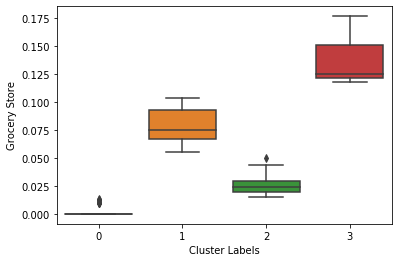

In [100]:
sns.boxplot(Houston_merged['Cluster Labels'], Houston_merged['Grocery Store'])

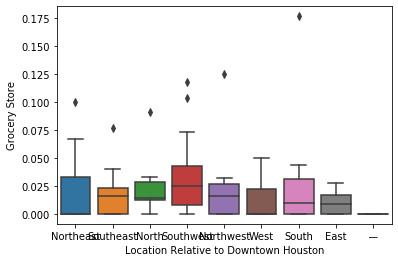

In [101]:
sns.boxplot(Houston_merged['Location Relative to Downtown Houston'], Houston_merged['Grocery Store'])

In [102]:
Houston_merged.describe()

,Grocery Store,Cluster Labels,Latitude,Longitude
count,88.000000,88.000000,88.000000,88.000000
mean,0.022197,0.897727,29.797026,-95.407313
std,0.032840,1.006185,0.380317,0.176511
min,0.000000,0.000000,29.579670,-96.627070
25%,0.000000,0.000000,29.694985,-95.486715
50%,0.012658,0.000000,29.744615,-95.386625
75%,0.027778,2.000000,29.814723,-95.307747
max,0.176471,3.000000,33.217340,-95.110510
